In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def butterworth_filter(shape, D0, n, type='low'):
    P, Q = shape
    U, V = np.meshgrid(np.arange(Q), np.arange(P))
    D = np.sqrt((U - Q/2)**2 + (V - P/2)**2)
    if type == 'low':
        H = 1 / (1 + (D/D0)**(2*n))
    elif type == 'high':
        H = 1 - 1 / (1 + (D/D0)**(2*n))
    elif type == 'band':
        H = np.exp(-((D**2 - D0**2)/(D*10+1e-5))**2)
    return H


In [3]:
def gaussian_filter(shape, D0, type='low'):
    P, Q = shape
    U, V = np.meshgrid(np.arange(Q), np.arange(P))
    D = np.sqrt((U - Q/2)**2 + (V - P/2)**2)
    if type == 'low':
        H = np.exp(-(D**2)/(2*(D0**2)))
    elif type == 'high':
        H = 1 - np.exp(-(D**2)/(2*(D0**2)))
    elif type == 'band':
        H = np.exp(-((D**2 - D0**2)/(D*10+1e-5))**2)
    return H

In [4]:
def apply_filter(img, H):
    f = np.fft.fftshift(np.fft.fft2(img))
    g = np.abs(np.fft.ifft2(np.fft.ifftshift(f * H)))
    return cv2.normalize(g, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

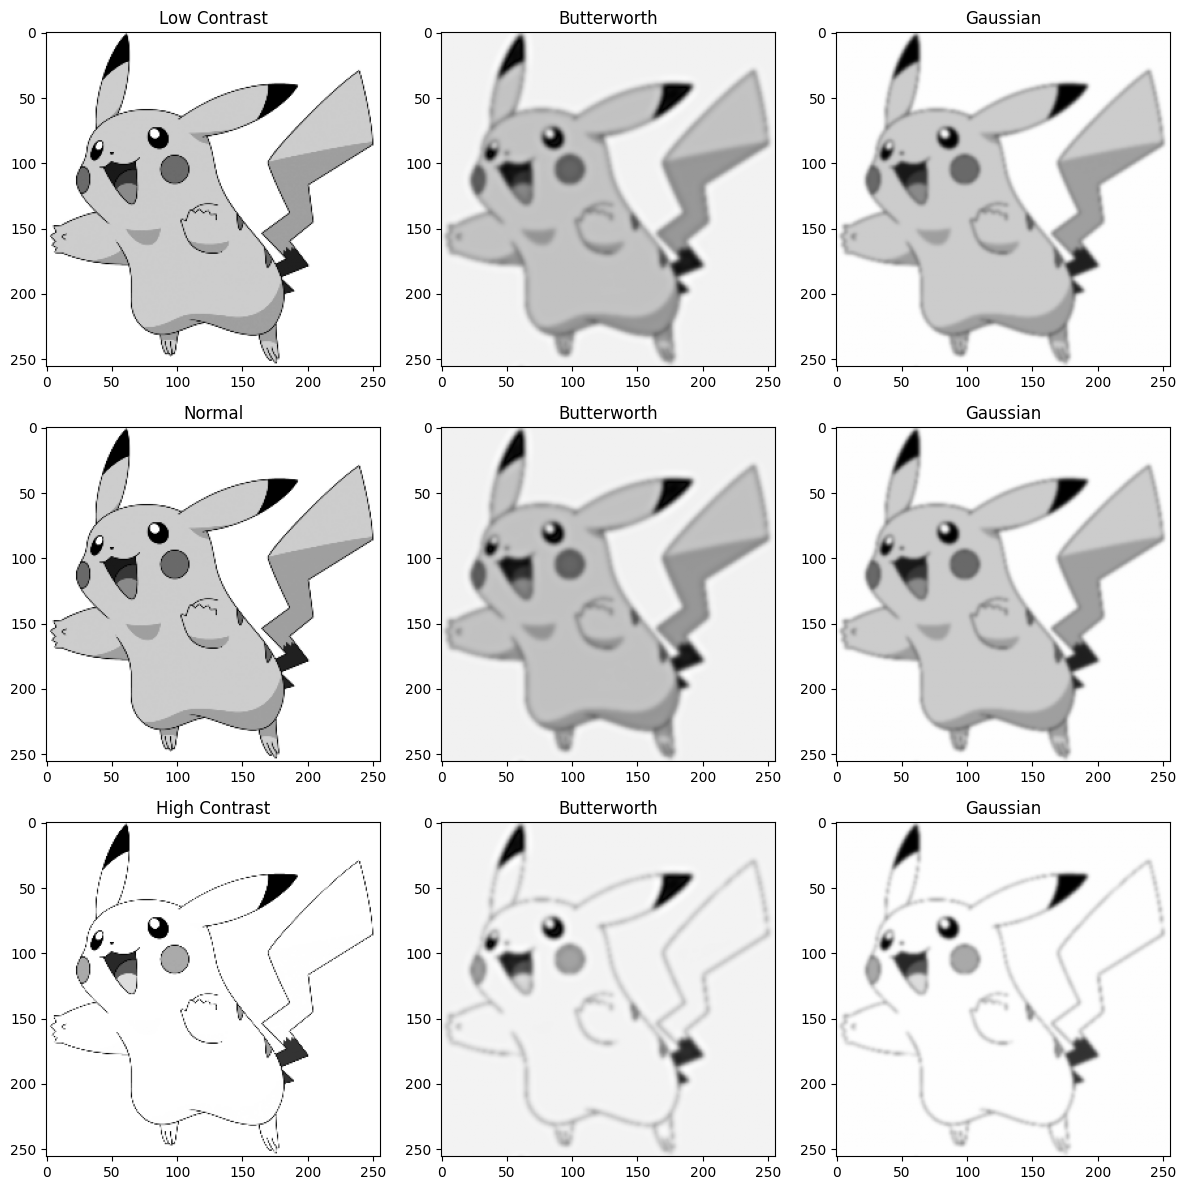

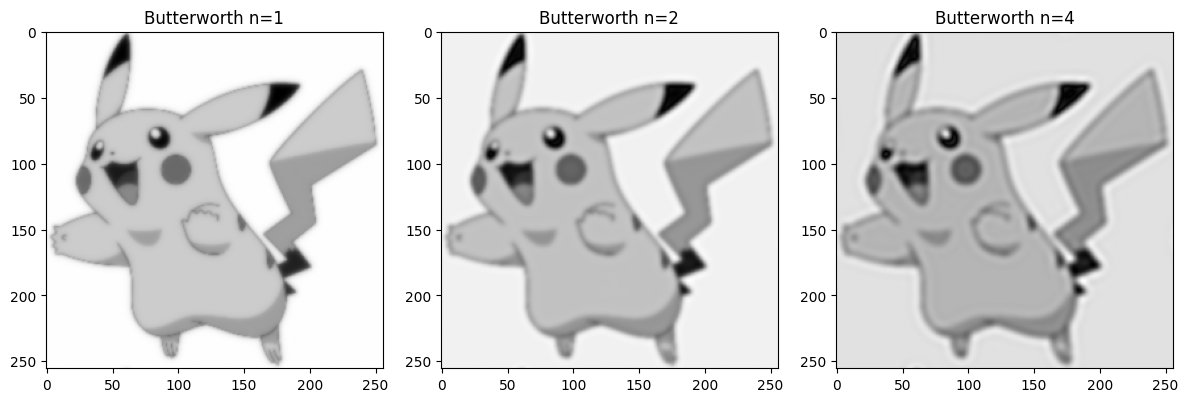

In [7]:
img = cv2.imread('../images/img7.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

low_contrast = cv2.convertScaleAbs(img, alpha=0.6, beta=0)
high_contrast = cv2.convertScaleAbs(img, alpha=1.6, beta=0)
images = [low_contrast, img, high_contrast]
titles = ['Low Contrast', 'Normal', 'High Contrast']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, image in enumerate(images):
    H_b = butterworth_filter(image.shape, 30, 2, 'low')
    H_g = gaussian_filter(image.shape, 30, 'low')
    out_b = apply_filter(image, H_b)
    out_g = apply_filter(image, H_g)
    axes[i, 0].imshow(image, cmap='gray'); axes[i, 0].set_title(titles[i])
    axes[i, 1].imshow(out_b, cmap='gray'); axes[i, 1].set_title('Butterworth')
    axes[i, 2].imshow(out_g, cmap='gray'); axes[i, 2].set_title('Gaussian')
plt.tight_layout()
plt.savefig('filter_results.png')

fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))
for i, n in enumerate([1, 2, 4]):
    H = butterworth_filter(img.shape, 30, n, 'low')
    out = apply_filter(img, H)
    axes2[i].imshow(out, cmap='gray')
    axes2[i].set_title(f'Butterworth n={n}')
plt.tight_layout()
plt.savefig('butterworth_n_comparison.png')